In [70]:
import pandas as pd

In [71]:
df = pd.read_csv('SolarEurope100.csv')

In [72]:
df.describe()

,'LAT','LON','DNI','GHI','DIF','GTIopta','OPTA','OPTA2','TEMP','ELE','TOTALPVOutput','GTIAnnualAverage'
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0,158.000000,158.000000,158.000000,158.000000
mean,50.829651,15.454465,1047.528481,1132.032911,563.576582,1335.567722,37.164557,180.0,9.050633,269.278481,119.314025,1333.498734
std,2.789739,8.744893,136.634270,97.230582,21.054165,120.277089,1.353743,0.0,2.202394,446.774596,320.805601,117.747174
min,45.080400,3.122300,845.300000,1015.400000,489.300000,1152.500000,35.000000,180.0,-5.600000,-100.000000,1.001000,1185.000000
25%,48.735275,7.622325,956.900000,1060.550000,551.650000,1249.025000,36.000000,180.0,8.425000,59.500000,1.033250,1249.075000
50%,51.328600,12.794150,1010.700000,1099.650000,562.700000,1299.200000,37.000000,180.0,9.400000,163.000000,1.072000,1299.550000
75%,53.132475,24.501150,1096.250000,1173.000000,577.475000,1369.225000,38.000000,180.0,10.275000,255.500000,1.179500,1361.825000
max,54.990600,29.971100,1671.400000,1450.100000,623.800000,1814.100000,44.000000,180.0,12.500000,3170.000000,999.479000,1795.700000


In [73]:
import matplotlib.pyplot as plt

In [74]:
columns = []
for column in df.columns:
    columns.append(column[1:-1])

In [75]:
df.columns = columns

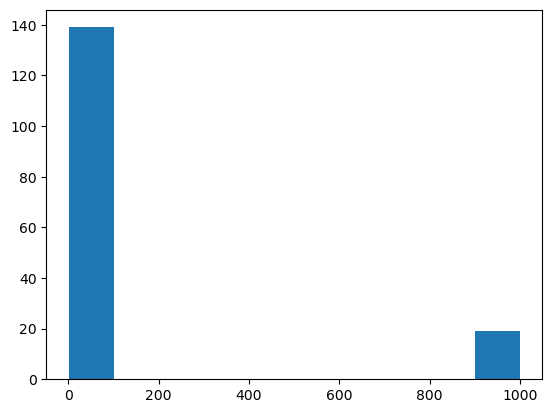

In [76]:
plt.hist(df['TOTALPVOutput'])
plt.show()

Outlier - but how much.

In [77]:
df[df['TOTALPVOutput'] > 200] # 19 seems big for this dataset - let's not use that as target

,LAT,LON,DNI,GHI,DIF,GTIopta,OPTA,OPTA2,TEMP,ELE,TOTALPVOutput,GTIAnnualAverage
2,52.0767,9.4480,904.8,1042.6,562.3,1227.2,37,180,9.4,182,993.419,1222.6
5,45.9413,6.3587,949.5,1119.3,489.3,1204.6,39,180,4.0,1152,952.666,1185.0
8,52.6218,7.6056,899.1,1031.7,566.3,1221.6,38,180,10.3,19,990.226,1222.0
15,51.9686,9.8979,908.0,1044.3,560.8,1223.9,37,180,9.1,245,993.342,1221.4
19,52.0280,6.9428,915.9,1048.2,569.2,1235.3,37,180,10.4,62,999.388,1233.7
32,53.1352,10.0244,888.4,1015.4,557.0,1197.7,37,180,9.8,71,971.162,1198.4
39,52.1119,5.3506,881.5,1028.2,571.8,1206.3,37,180,10.5,38,978.122,1205.2
55,53.1164,10.0890,890.3,1016.0,555.9,1195.7,37,180,9.8,74,968.923,1195.5
56,47.6952,15.3153,845.3,1054.3,554.7,1152.5,38,180,5.8,1162,975.422,1200.3
57,51.1385,9.8420,876.0,1048.3,560.6,1220.4,36,180,8.9,384,991.028,1221.8


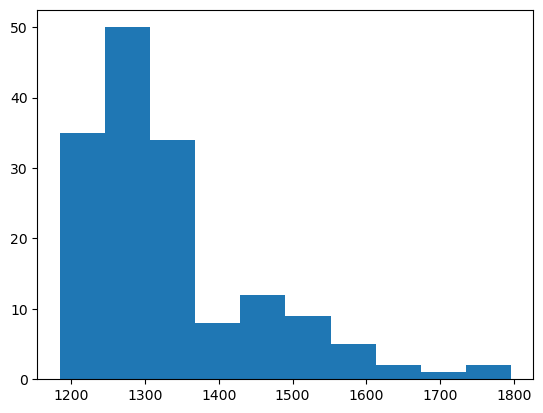

In [78]:
plt.hist(df['GTIAnnualAverage'])
plt.show()

Better - let's use that

In [79]:
df.corr()

,LAT,LON,DNI,GHI,DIF,GTIopta,OPTA,OPTA2,TEMP,ELE,TOTALPVOutput,GTIAnnualAverage
LAT,1.000000,0.082278,-0.744166,-0.884863,-0.494610,-0.814011,0.121848,NaN,0.110762,-0.561475,0.152770,-0.811842
LON,0.082278,1.000000,0.054977,0.059713,0.163605,0.051015,0.022191,NaN,-0.200505,-0.126061,-0.191713,0.055455
DNI,-0.744166,0.054977,1.000000,0.954166,0.199126,0.984524,0.149331,NaN,-0.266124,0.561585,-0.376327,0.982015
GHI,-0.884863,0.059713,0.954166,1.000000,0.398090,0.982866,-0.032928,NaN,-0.141730,0.514642,-0.340767,0.980528
DIF,-0.494610,0.163605,0.199126,0.398090,1.000000,0.316162,-0.531865,NaN,0.485295,-0.198733,-0.159797,0.318970
GTIopta,-0.814011,0.051015,0.984524,0.982866,0.316162,1.000000,0.084192,NaN,-0.206794,0.546764,-0.372138,0.997904
OPTA,0.121848,0.022191,0.149331,-0.032928,-0.531865,0.084192,1.000000,NaN,-0.690071,0.515149,-0.002329,0.083899
OPTA2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEMP,0.110762,-0.200505,-0.266124,-0.141730,0.485295,-0.206794,-0.690071,NaN,1.000000,-0.831635,-0.007366,-0.201141
ELE,-0.561475,-0.126061,0.561585,0.514642,-0.198733,0.546764,0.515149,NaN,-0.831635,1.000000,-0.027061,0.544768


In [80]:
df['OPTA2'].unique() # drop it

array([180])

In [81]:
df.drop('OPTA2', axis=1, inplace=True)

In [82]:
df.corr()

,LAT,LON,DNI,GHI,DIF,GTIopta,OPTA,TEMP,ELE,TOTALPVOutput,GTIAnnualAverage
LAT,1.000000,0.082278,-0.744166,-0.884863,-0.494610,-0.814011,0.121848,0.110762,-0.561475,0.152770,-0.811842
LON,0.082278,1.000000,0.054977,0.059713,0.163605,0.051015,0.022191,-0.200505,-0.126061,-0.191713,0.055455
DNI,-0.744166,0.054977,1.000000,0.954166,0.199126,0.984524,0.149331,-0.266124,0.561585,-0.376327,0.982015
GHI,-0.884863,0.059713,0.954166,1.000000,0.398090,0.982866,-0.032928,-0.141730,0.514642,-0.340767,0.980528
DIF,-0.494610,0.163605,0.199126,0.398090,1.000000,0.316162,-0.531865,0.485295,-0.198733,-0.159797,0.318970
GTIopta,-0.814011,0.051015,0.984524,0.982866,0.316162,1.000000,0.084192,-0.206794,0.546764,-0.372138,0.997904
OPTA,0.121848,0.022191,0.149331,-0.032928,-0.531865,0.084192,1.000000,-0.690071,0.515149,-0.002329,0.083899
TEMP,0.110762,-0.200505,-0.266124,-0.141730,0.485295,-0.206794,-0.690071,1.000000,-0.831635,-0.007366,-0.201141
ELE,-0.561475,-0.126061,0.561585,0.514642,-0.198733,0.546764,0.515149,-0.831635,1.000000,-0.027061,0.544768
TOTALPVOutput,0.152770,-0.191713,-0.376327,-0.340767,-0.159797,-0.372138,-0.002329,-0.007366,-0.027061,1.000000,-0.376109


In [83]:
# Well we can do GTIAnnualAverage with one feature
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [96]:
y = df[['GTIAnnualAverage']]
x = df[['DNI']]

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=123)

In [98]:
mms = MinMaxScaler()
mms_y = MinMaxScaler()

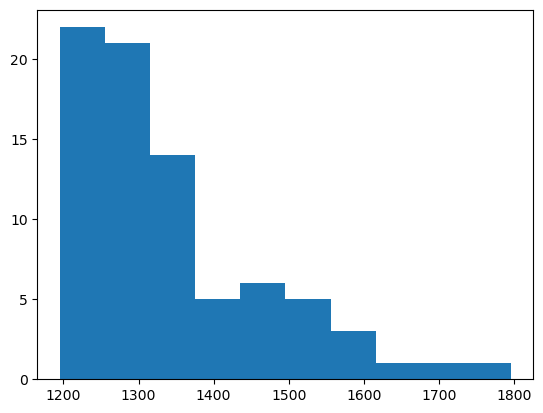

In [99]:
plt.hist(y_train)
plt.show()

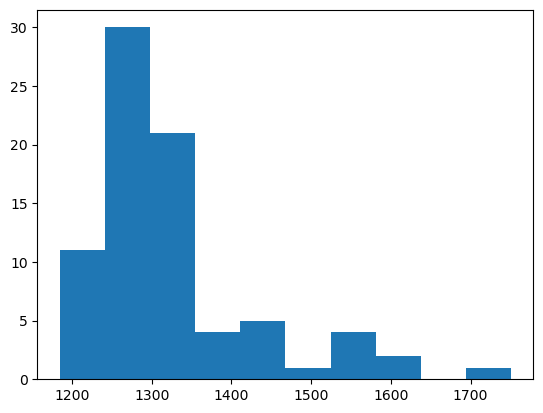

In [100]:
plt.hist(y_test)
plt.show()

In [101]:
mms.fit(x_train)
mms_y.fit(y_train)

MinMaxScaler()

In [106]:
x_train = mms.transform(x_train)
x_test = mms.transform(x_test)
y_train = mms_y.transform(y_train)
y_test = mms_y.transform(y_test)

/Users/hidenn/anaconda3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/hidenn/anaconda3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [107]:
y_test

array([[ 0.15611463],
       [ 0.25791403],
       [ 0.04681773],
       [ 0.14345218],
       [ 0.58613795],
       [ 0.09763412],
       [ 0.07714095],
       [ 0.08863712],
       [ 0.92485838],
       [ 0.08630457],
       [ 0.6107964 ],
       [ 0.35904698],
       [ 0.20093302],
       [ 0.20009997],
       [ 0.04415195],
       [ 0.15211596],
       [ 0.11929357],
       [ 0.27674109],
       [ 0.34488504],
       [ 0.13012329],
       [ 0.17260913],
       [ 0.44251916],
       [ 0.06247917],
       [ 0.45518161],
       [ 0.08513829],
       [ 0.13662113],
       [ 0.11862712],
       [ 0.03465511],
       [ 0.19176941],
       [ 0.19776741],
       [ 0.56631123],
       [ 0.43968677],
       [ 0.3922026 ],
       [ 0.13662113],
       [ 0.11262912],
       [ 0.08397201],
       [ 0.08897034],
       [ 0.17410863],
       [ 0.71642786],
       [ 0.05814728],
       [ 0.24858381],
       [ 0.11012996],
       [ 0.42752416],
       [ 0.15361546],
       [ 0.58863712],
       [ 0

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
lr = LinearRegression()

In [110]:
lr.fit(x_train, y_train)

LinearRegression()

In [111]:
lr.score(x_test, y_test)

0.9620329633063106

In [112]:
lr.score(x_train, y_train)

0.9639128431108159

In [113]:
y_train

array([[0.02665778],
       [0.07714095],
       [0.06514495],
       [0.46434522],
       [0.00799733],
       [0.4131956 ],
       [0.1107964 ],
       [0.4056981 ],
       [0.27724092],
       [0.67927358],
       [0.15694768],
       [0.18443852],
       [0.16194602],
       [0.15544818],
       [0.12212596],
       [0.31106298],
       [0.14895035],
       [0.4985005 ],
       [0.08213929],
       [0.05481506],
       [0.023992  ],
       [0.07997334],
       [0.6422859 ],
       [0.04315228],
       [0.87554149],
       [0.07547484],
       [0.38837054],
       [0.12862379],
       [0.20826391],
       [0.12595801],
       [0.06864379],
       [0.1901033 ],
       [0.52632456],
       [0.44218594],
       [0.53982006],
       [0.22942353],
       [0.13462179],
       [0.11062979],
       [0.12845718],
       [0.24958347],
       [0.54915028],
       [0.20109963],
       [0.09013662],
       [0.12695768],
       [0.26107964],
       [0.33805398],
       [0.20093302],
       [0.166

In [114]:
y_test

array([[ 0.15611463],
       [ 0.25791403],
       [ 0.04681773],
       [ 0.14345218],
       [ 0.58613795],
       [ 0.09763412],
       [ 0.07714095],
       [ 0.08863712],
       [ 0.92485838],
       [ 0.08630457],
       [ 0.6107964 ],
       [ 0.35904698],
       [ 0.20093302],
       [ 0.20009997],
       [ 0.04415195],
       [ 0.15211596],
       [ 0.11929357],
       [ 0.27674109],
       [ 0.34488504],
       [ 0.13012329],
       [ 0.17260913],
       [ 0.44251916],
       [ 0.06247917],
       [ 0.45518161],
       [ 0.08513829],
       [ 0.13662113],
       [ 0.11862712],
       [ 0.03465511],
       [ 0.19176941],
       [ 0.19776741],
       [ 0.56631123],
       [ 0.43968677],
       [ 0.3922026 ],
       [ 0.13662113],
       [ 0.11262912],
       [ 0.08397201],
       [ 0.08897034],
       [ 0.17410863],
       [ 0.71642786],
       [ 0.05814728],
       [ 0.24858381],
       [ 0.11012996],
       [ 0.42752416],
       [ 0.15361546],
       [ 0.58863712],
       [ 0

So this is just really easy to predict. Let's delete outliers in another potential target.

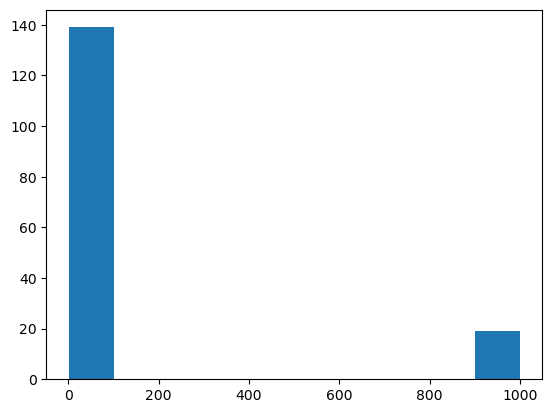

In [116]:
plt.hist(df['TOTALPVOutput'])
plt.show()

In [117]:
df = df[df['TOTALPVOutput'] < 200]

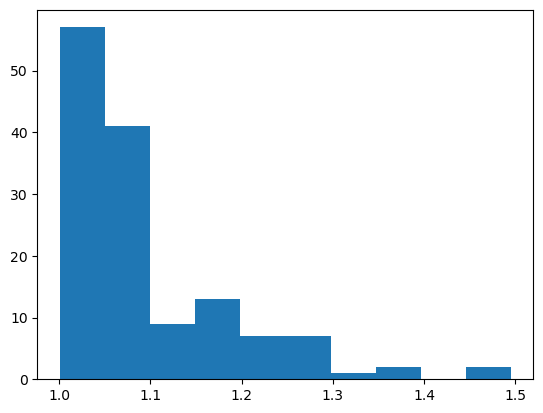

In [118]:
plt.hist(df['TOTALPVOutput'])
plt.show()

Check for correlations

In [119]:
df.corr()

,LAT,LON,DNI,GHI,DIF,GTIopta,OPTA,TEMP,ELE,TOTALPVOutput,GTIAnnualAverage
LAT,1.000000,0.094749,-0.786662,-0.913119,-0.557617,-0.866014,0.135756,0.078500,-0.539036,-0.834216,-0.863188
LON,0.094749,1.000000,-0.025041,-0.000482,0.162324,-0.022747,0.000803,-0.189003,-0.143260,-0.046520,-0.021404
DNI,-0.786662,-0.025041,1.000000,0.953322,0.170890,0.983672,0.162086,-0.298108,0.621897,0.985845,0.981772
GHI,-0.913119,-0.000482,0.953322,1.000000,0.403309,0.986773,-0.037324,-0.145172,0.540532,0.966624,0.984891
DIF,-0.557617,0.162324,0.170890,0.403309,1.000000,0.289779,-0.540465,0.464331,-0.177796,0.219107,0.290043
GTIopta,-0.866014,-0.022747,0.983672,0.986773,0.289779,1.000000,0.097453,-0.241818,0.609316,0.993069,0.998465
OPTA,0.135756,0.000803,0.162086,-0.037324,-0.540465,0.097453,1.000000,-0.698593,0.530657,0.156672,0.094903
TEMP,0.078500,-0.189003,-0.298108,-0.145172,0.464331,-0.241818,-0.698593,1.000000,-0.832381,-0.311140,-0.233785
ELE,-0.539036,-0.143260,0.621897,0.540532,-0.177796,0.609316,0.530657,-0.832381,1.000000,0.666281,0.604561
TOTALPVOutput,-0.834216,-0.046520,0.985845,0.966624,0.219107,0.993069,0.156672,-0.311140,0.666281,1.000000,0.994290


Same linear correlation. Let's make also normal linear regression.

In [120]:
# Well we can do GTIAnnualAverage with one feature
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y = df[['TOTALPVOutput']]
x = df[['DNI']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=123)
mms = MinMaxScaler()
mms_y = MinMaxScaler()

In [121]:
mms.fit(x_train)
mms_y.fit(y_train)

MinMaxScaler()

In [122]:
x_train = mms.transform(x_train)
x_test = mms.transform(x_test)
y_train = mms_y.transform(y_train)
y_test = mms_y.transform(y_test)

In [123]:
lr.fit(x_train, y_train)

LinearRegression()

In [124]:
lr.score(x_test, y_test)

0.9723839760106952

In [125]:
lr.score(x_train, y_train)

0.9701264550753982

Even better results.